#### Importando as bibliotecas

In [49]:
# tratamendo dos dados
import pandas as pd
import numpy as np

# plot dos graficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# algoritmos de agrupamento
from sklearn.cluster import KMeans, DBSCAN

# feature engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# avaliacao do desempenho
from sklearn.metrics import adjusted_rand_score, silhouette_score

#### Carregando os dados

In [50]:
dados = pd.read_csv(r'D:\Documentos\FIAP - Pos Tech Data Analytics\Aulas\Fase 2\Dados\mall.csv', sep=',')

In [51]:
dados.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [52]:
dados.shape

(200, 5)

#### Limpeza dos dados

In [53]:
# valores nulos
dados.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Análise exploratória dos dados
- Conhecer os dados, identificar padrões, encontrar anomalias, etc.

In [54]:
dados.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Analisando a distribuição das variáveis:

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

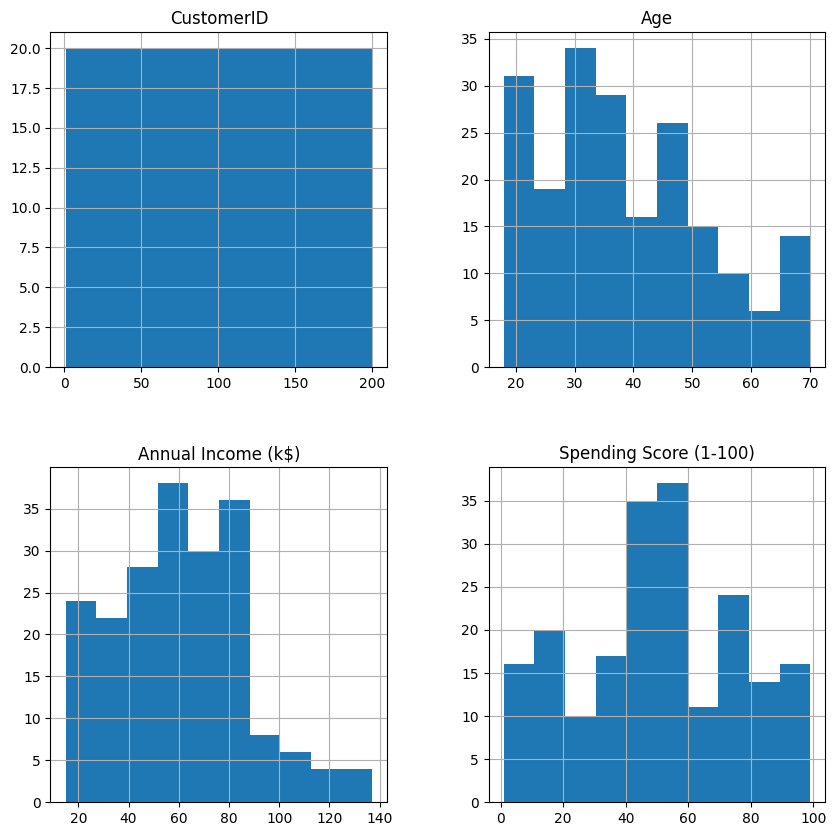

In [55]:
dados.hist(figsize=(10, 10))

Analisando a correlação entre as variáveis:

<Axes: >

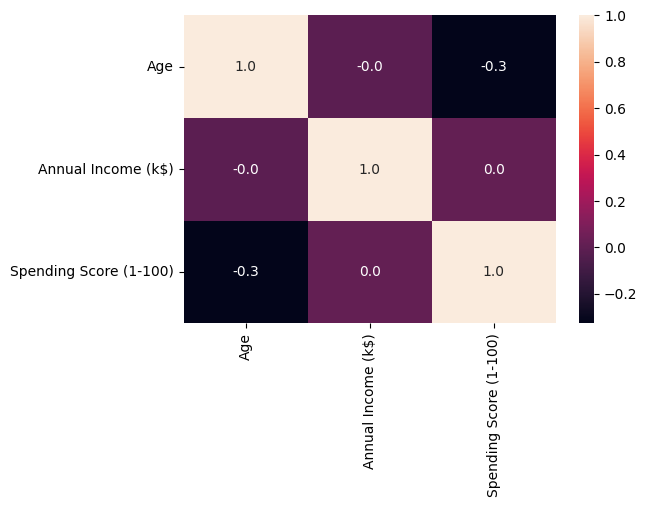

In [56]:
plt.figure(figsize=(6, 4))
sns.heatmap(dados[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(method='pearson'), annot=True, fmt='.1f')

Analisando a proporçao entre gêneros:

In [57]:
dados['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

Boa proporção entre os gêneros que temos disponíveis em nossos dados.

Abaixo gráfico com todos os dados para checar os possíveis agrupamentos que podem ser realizados.

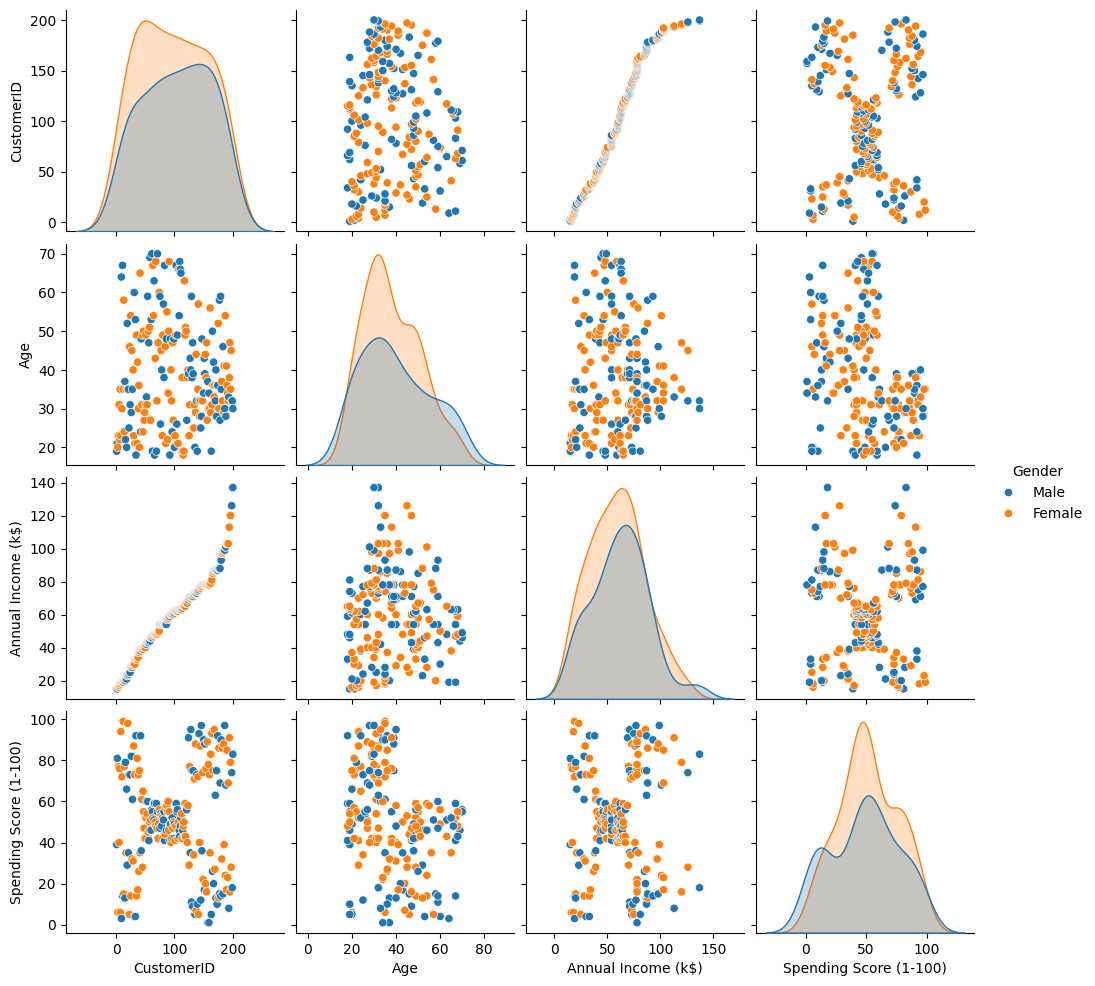

In [58]:
sns.pairplot(dados, hue='Gender')
plt.show()

Aparentemente o Annuel Income e o Spending Score permitem alguns agrupamentos dos nossos dados.

#### Feature Scaling

Verificando a necessidade de utilizar a padronização ou normalização dos dados

In [59]:
scaler = StandardScaler()
scaler.fit(dados[['Annual Income (k$)', 'Spending Score (1-100)']])

StandardScaler()

In [60]:
dados_escalonados = scaler.transform(dados[['Annual Income (k$)', 'Spending Score (1-100)']])

In [61]:
dados_escalonados

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

#### Criando os agrupamentos

Criando agrupamentos com diferentes metodologias:

1- K-Means

Escolhendo a quantidade de grupos usando o método do cotovelo

In [62]:
# lista com quantidade de clusters que serão testados
k = list(range(1, 10))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


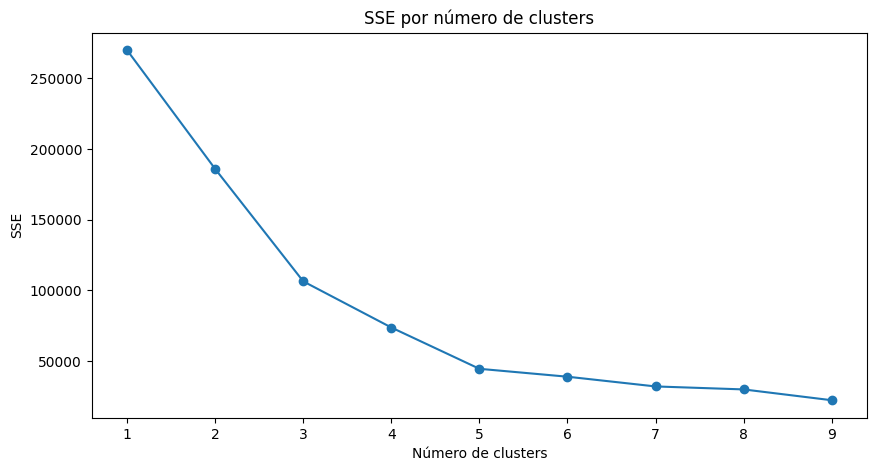

In [63]:
# armazena o SSE (soma dos erros quadraticos) para cada quantidade de k
sse = []

# roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dados[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(kmeans.inertia_) # calculo do erro do k-means (mudar o centroide dos dados)

# plotando o gráfico
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(k, sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('SSE por número de clusters')
plt.show()

O número 5 é o mais interessante

Executando o algoritmo sem feature scalling

In [64]:
# Definindo o modelo de clusterização para dados não escalonados. K-MEANS com 6 clusters (foi a quantidade de grupos identificados no pairplot)
kmeans = KMeans(n_clusters=5, random_state=0) # definindo os hiperparâmetros do algoritmo

# Implementando o kmeans nos dados
kmeans.fit(dados[['Annual Income (k$)', 'Spending Score (1-100)']])

# Salvando os centroides de cada clusters
centroides = kmeans.cluster_centers_

# Salvando os labels de cada clusters
kmeans_labels = kmeans.predict(dados[['Annual Income (k$)', 'Spending Score (1-100)']])

In [65]:
print(kmeans_labels)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


Executando com feature scalling

In [66]:
# Definindo o modelo de clusterização para dados escalonados. K-MEANS com 6 clusters (foi a quantidade de grupos identificados no pairplot)
kmeans_escalonados = KMeans(n_clusters=5, random_state=0)

# Implementando o kmeans nos dados escalonados
kmeans_escalonados.fit(dados_escalonados)

# Salvando os centroides de cada cluster
centroides_escalonados = kmeans_escalonados.cluster_centers_

# Salvando os labels de cada clusters
kmeans_labels_escalonados = kmeans_escalonados.predict(dados_escalonados)

In [67]:
print(kmeans_labels_escalonados)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [68]:
# criando um df para os dados escalonados
dados_escalonados = pd.DataFrame(dados_escalonados, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

Resultado com feature scalling

In [69]:
# incluindo uma coluna com a classificação dos clusters
dados_escalonados['Cluster'] = kmeans_labels_escalonados
dados_escalonados.head(3)

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,3


Resultado sem feature scalling

In [70]:
# incluindo uma coluna com a classificação dos clusters
dados['Cluster'] = kmeans_labels
dados.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3


#### Analisando a previsao e os centroides

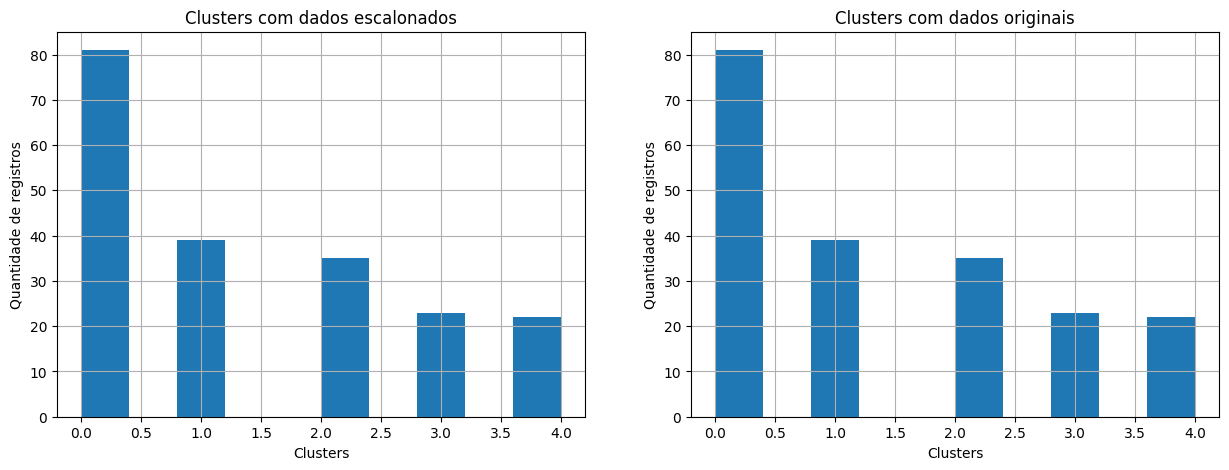

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

dados_escalonados['Cluster'].hist(ax=ax[0])
ax[0].set_title('Clusters com dados escalonados')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Quantidade de registros')

dados['Cluster'].hist(ax=ax[1])
ax[1].set_title('Clusters com dados originais')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Quantidade de registros')

plt.show()

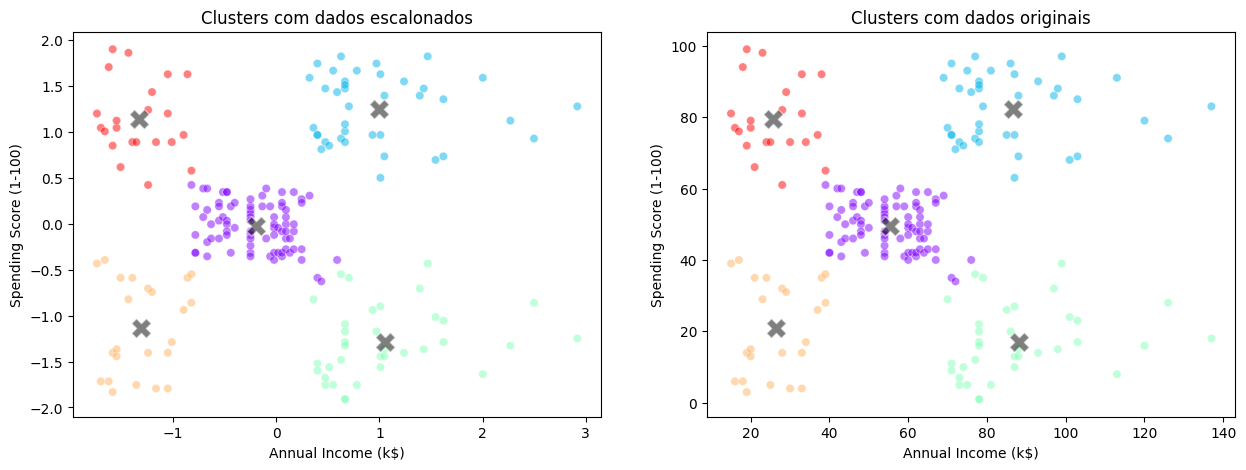

In [72]:
# configurando os gráficos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

## dados escalonados
# plotando os dados identificando com cores diferentes os clusters
sns.scatterplot(data=dados_escalonados, x='Annual Income (k$)', y='Spending Score (1-100)', c=kmeans_labels_escalonados, alpha=0.5, cmap='rainbow', ax=ax[0])
ax[0].set_title('Clusters com dados escalonados')
ax[0].set_xlabel('Annual Income (k$)')
ax[0].set_ylabel('Spending Score (1-100)')

# plotando os centroides
sns.scatterplot(x=centroides_escalonados[:, 0], y=centroides_escalonados[:, 1], s=200, c='black', alpha=0.5, marker='X', ax=ax[0])

## dados originais
# plotando os dados identificando com cores diferentes os clusters
sns.scatterplot(data=dados, x='Annual Income (k$)', y='Spending Score (1-100)', c=kmeans_labels, alpha=0.5, cmap='rainbow', ax=ax[1])
ax[1].set_title('Clusters com dados originais')
ax[1].set_xlabel('Annual Income (k$)')
ax[1].set_label('Spending Score (1-100)')

# plotando os centroides
sns.scatterplot(x=centroides[:,0], y=centroides[:,1], s=200, c='black', alpha=0.5, marker='X', ax=ax[1])

plt.show()

In [73]:
dados.groupby('Cluster')['Age'].mean()

Cluster
0    42.716049
1    32.692308
2    41.114286
3    45.217391
4    25.272727
Name: Age, dtype: float64

In [74]:
dados.groupby('Cluster')['Annual Income (k$)'].mean()

Cluster
0    55.296296
1    86.538462
2    88.200000
3    26.304348
4    25.727273
Name: Annual Income (k$), dtype: float64